# Parser

This notebook contains instructions for how to replay games that has been scraped, to create a database of positions/centers/whatever. The code base will be expanded over time, based on what databases we're asked for.

## Imports

In [1]:
import os
os.chdir('../')

import pandas as pd

from positions.parser import GameFile
from positions.database import PositionsDB
from adjudicator.game import OrderInputError

## Replaying one game

The `GameFile` class from `positions.parser` can be used to lead a game html-file and replay the game.

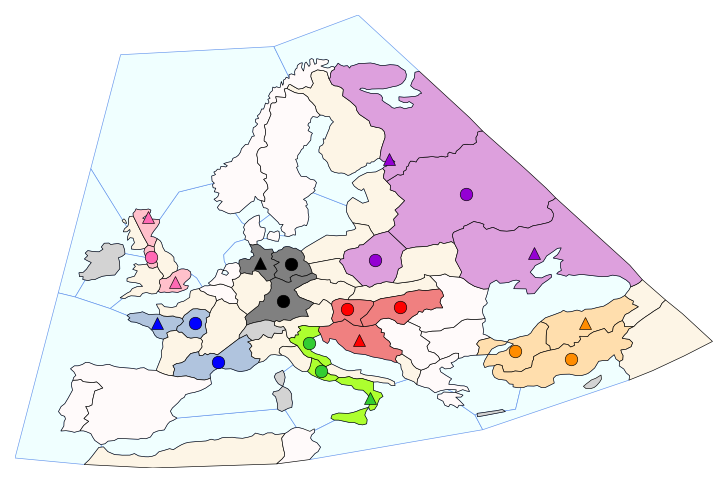

In [14]:
game = GameFile('Classic', 'ClassicGunboat', 'webDiplomacy', '72708')
game.game.show()

Use the `adjudicate()` method to move the game forward one phase.

Use the `run()` method to replay the game until its end.

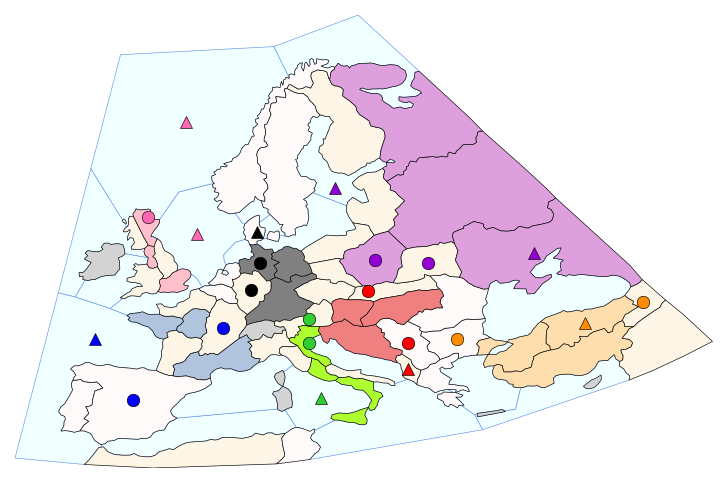

In [15]:
game.adjudicate()
game.game.show()

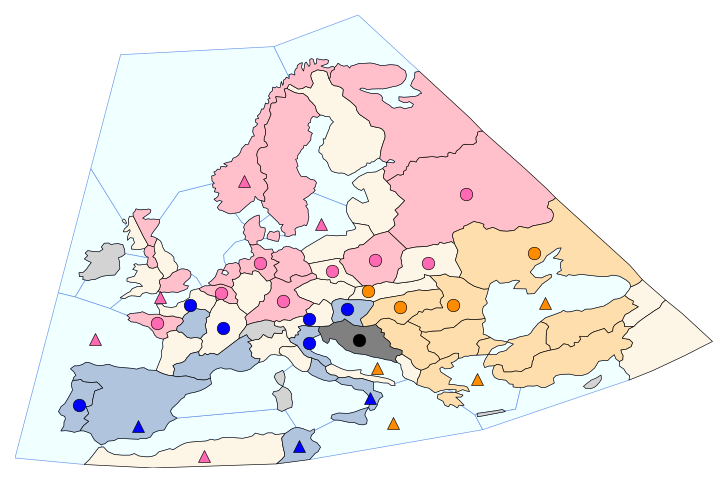

In [17]:
game.run()
game.game.show()

## Creating a database of positions

The `PositionsDB` class form `positions.database` can be used to play through all games associated with a given variant, and create your desired database. At the moment, customizable options are somewhat limited. Playing and loading games can be somewhat tedius. The code runs at ~1s per game.

In [2]:
data = PositionsDB('Classic', 'ClassicGunboat', 'webDiplomacy')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3347: DtypeWarning: Columns (43,63) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


To make a database over supply center-controle, use the `load_centers(k)` method. Here, `k` sets a limit on the number of games to load in one batch. That is, you can load games in batches.

In [13]:
data.load_centers(5000)

Use the `save_csv()` method to save the database as a csv-file in the `positions/data` folder. The file is named automatically. Back-up copies will have to be made manually.

In [18]:
data.save_csv()

Use the `load_csv()` method to load a csv-file. Note that, loading a file completely overwrites the corrently loaded databse. So be a little careful.

In [7]:
data.load_csv()